# Air BnB'S

In [ ]:
<img src="Ontario-Airbnbs.jpg" style="width:200pxl;height:200 pxl"/>

 **I have a few properties in mind but want to see if I can generate some extra revenue through AirBnB. How can I estimate the rental price that each property can go for on AirBnB, based on its characteristics?**

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))
pd.options.display.max_columns = None
# to make this notebook's output identical at every run
np.random.seed(0)

In [2]:
pd.options.display.max_columns = None
np.random.seed(0)

In [3]:
df = pd.read_csv('toronto_listings_119.csv', index_col='id')
df

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,43.646168,-79.424510,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",470.0,1,0,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,0.16
8077,f,2.0,t,f,43.641051,-79.376277,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,1,0,169,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,1.48
12604,f,1.0,t,t,43.667241,-79.415978,t,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",66.0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,NaN
23691,t,2.0,t,t,43.696017,-79.454683,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",70.0,2,351,207,95.0,10.0,10.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,1.97
26654,f,7.0,t,t,43.645305,-79.389404,t,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",199.0,2,328,35,95.0,9.0,9.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31517024,f,6.0,t,f,43.701751,-79.287846,t,Bungalow,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Free street ...",61.0,3,263,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,strict_14_with_grace_period,NaN
31517341,f,2.0,t,f,43.777792,-79.416747,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",50.0,1,346,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,strict_14_with_grace_period,NaN
31517380,f,3.0,t,f,43.677890,-79.313121,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",150.0,1,83,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,flexible,NaN


# Exploring the data

In [4]:
df_explore = df.copy()

In [5]:
df.shape

(19647, 29)

In [6]:
df_explore.dtypes

host_is_superhost               object
host_listings_count            float64
host_has_profile_pic            object
host_identity_verified          object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
amenities                       object
price                          float64
guests_included                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [7]:
# Sort by dtype
#For convenience, we can sort the variables by data type.
dep_var = ['price']

categorical_vars = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
            'is_location_exact', 'property_type', 'room_type', 'bed_type', 
            'instant_bookable', 'cancellation_policy', 'amenities']

discrete_vars = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                 'guests_included', 'availability_365',
                 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                 'review_scores_communication', 'review_scores_location']

continuous_vars = ['latitude', 'longitude', 'reviews_per_month']

In [8]:
#df_explore = df_explore.dropna()

In [9]:
#Quantitative features

df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,price,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_communication,review_scores_location,latitude,longitude,reviews_per_month
count,19647.000000,19644.000000,19647.000000,19633.000000,19640.000000,19626.000000,19647.000000,19647.000000,19647.000000,15613.000000,15603.000000,15604.000000,15599.000000,15605.000000,15605.000000,15596.000000,19647.000000,19647.000000,15879.000000
mean,138.220644,5.330330,3.117270,1.246677,1.318075,1.675431,1.651550,131.599634,23.937090,94.395119,9.654682,9.425916,9.747356,9.766870,9.766870,9.666261,43.679349,-79.396999,1.868888
std,227.781590,12.480221,1.994722,0.565848,0.890284,1.105689,1.282553,131.081823,43.480971,7.900610,0.783819,0.950326,0.714697,0.691058,0.691058,0.669200,0.047557,0.061323,2.098605
min,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,43.586713,-79.627224,0.010000
25%,65.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,43.645072,-79.424372,0.380000
50%,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,88.000000,7.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.662214,-79.397298,1.040000
75%,155.000000,4.000000,4.000000,1.000000,2.000000,2.000000,2.000000,242.000000,26.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.693974,-79.377428,2.650000
max,13267.000000,272.000000,16.000000,12.500000,30.000000,30.000000,16.000000,365.000000,656.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,43.834825,-79.127812,15.850000


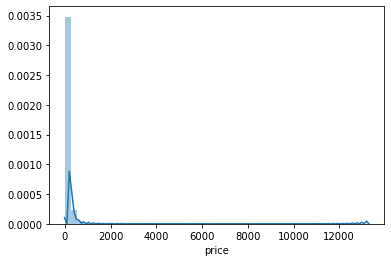

In [10]:
#Price is our dependent variable. It has some characteristics that can be problematic for modelling. Its value cannot drop below zero, meaning it is likely not normally distributed. Let's use the seaborn distplot function to view the price distribution.
sns.distplot(df_explore['price'])


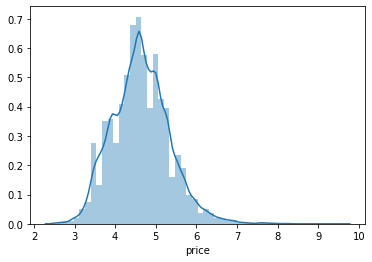

In [11]:
sns.distplot(np.log(df_explore['price']))
df_explore['log_price'] = np.log(df_explore['price'])

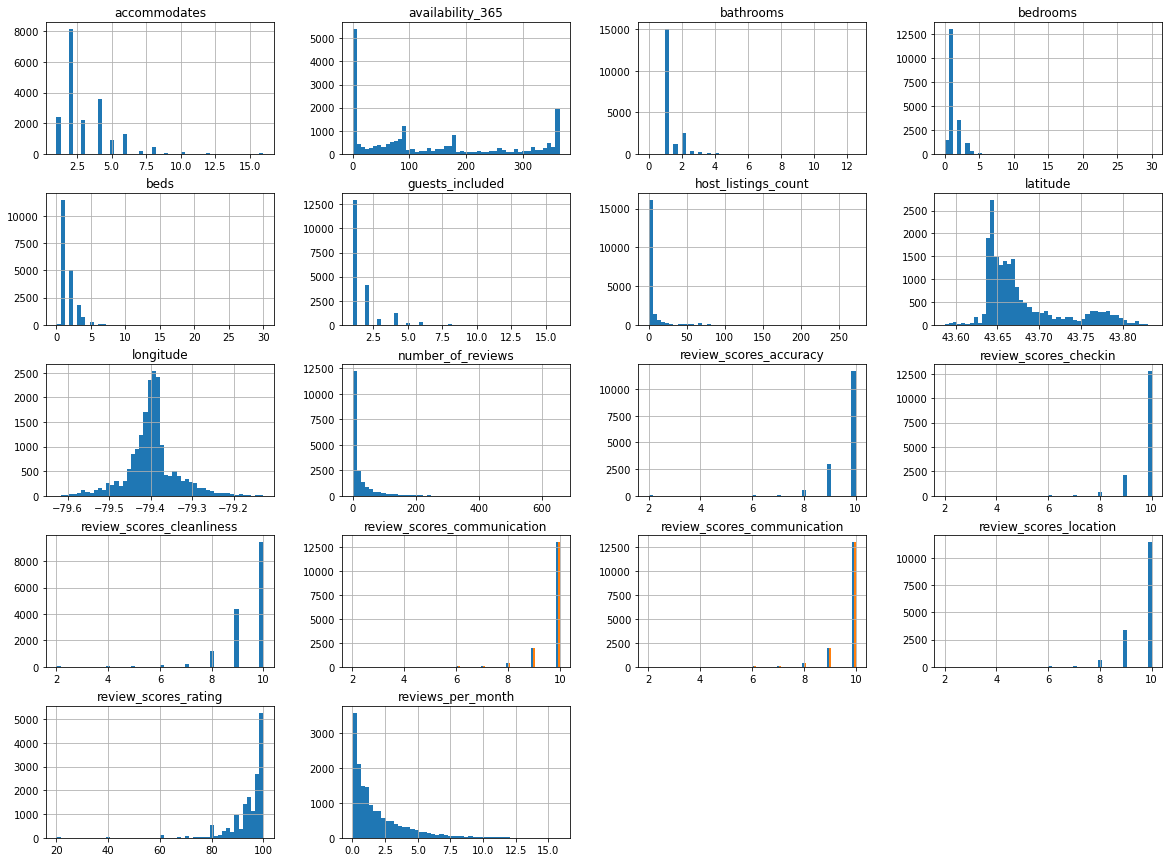

In [12]:
df_explore.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [13]:
#Our data has many different characteristics: it is not normally distributed, and it is sometimes continuous and sometimes 
#discrete. For the discrete data (reviews_per_month) we can log transform just like we did with price.

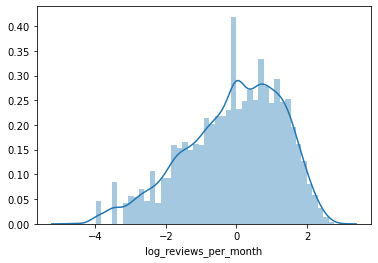

In [14]:
df_explore['log_reviews_per_month'] = df_explore['reviews_per_month'].apply(np.log)
sns.distplot(df_explore['log_reviews_per_month'].dropna())
plt.show()
continuous_vars[2] = 'log_reviews_per_month'

In [15]:
#categorical variables
#It is clear that the property_type and amenities categories are a little messy in their raw form. For property_type, we
#can combine some of the less common values into a broader "other" bucket to make exploration easier.

In [16]:
others = [x for x in df_explore['property_type'].value_counts().index if df_explore['property_type'].value_counts()[x] <= 10]
others

['Camper/RV',
 'Boat',
 'Cottage',
 'Barn',
 'Tiny house',
 'Casa particular (Cuba)',
 'Earth house',
 'Castle',
 'Dome house',
 'Cave',
 'Cabin',
 'Aparthotel',
 'Tent',
 'Farm stay',
 'Parking Space',
 'Treehouse',
 'Plane',
 'Dorm',
 'Hotel']

In [17]:
df_explore['property_type'] = df_explore['property_type'].apply(lambda x: 'Other' if x in others else x)
df_explore['property_type'].value_counts()

Apartment             6129
House                 5201
Condominium           4886
Townhouse              980
Guest suite            691
Bungalow               591
Loft                   452
Serviced apartment     256
Other                  113
Bed and breakfast      106
Guesthouse             103
Villa                   70
Boutique hotel          45
Hostel                  24
Name: property_type, dtype: int64

If we reflect back on the problem identified at the start of the project, we can identify some values that will not be
applicable. The different review scores are all determined after a property has been used on AirBnB, not to mention the 
heavy skew towards high values. For the purpose of setting up a new AirBnB they should probably be ignored.

In [18]:
review_vars = ['number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
'review_scores_communication', 'review_scores_location', 'reviews_per_month']

df_explore = df_explore.drop(review_vars, axis=1)

discrete_vars = [x for x in discrete_vars if x not in review_vars]
continuous_vars = [x for x in continuous_vars if x not in review_vars]

In [19]:
#The amenities are going to be a bit trickier to handle, as they are not stored in a format easily read by Python.
#we will leave amenities out
df_explore = df_explore.drop("amenities", axis=1)

# Correlation Analysis

Now is a good time to take a preliminary look at which features may help us predict the rental price. We can look at basic
correlations with DataFrame.corr() and select the correlations with log_price. We will use the default Pearson correlation 
coefficient.

In [20]:
corr_matrix = df_explore.loc[:, ['log_price'] + continuous_vars].corr(method='pearson')
corr_matrix['log_price'].sort_values(ascending=False)

log_price                1.000000
log_reviews_per_month    0.014379
longitude               -0.008261
latitude                -0.341724
Name: log_price, dtype: float64

In [21]:
corr_matrix = df_explore.loc[:, ['log_price'] + discrete_vars].corr(method='pearson')
corr_matrix['log_price'].sort_values(ascending=False)

log_price              1.000000
accommodates           0.564613
beds                   0.454588
bedrooms               0.448624
bathrooms              0.355200
guests_included        0.351468
availability_365       0.037215
host_listings_count    0.036350
Name: log_price, dtype: float64

In [22]:
#we can use Seaborn's pairplot to look at these relationships visually.

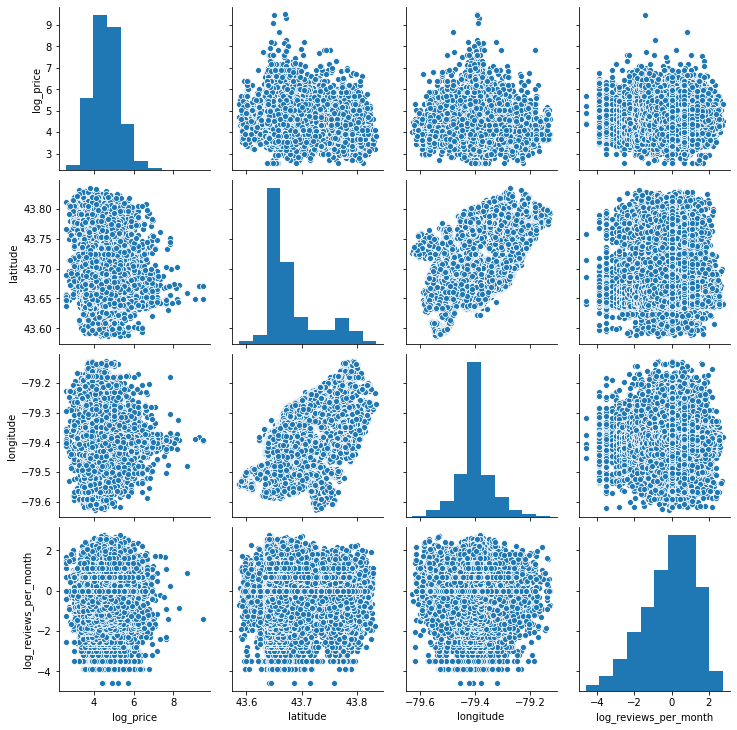

In [23]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + continuous_vars])
plt.show()

There are no major patterns in the continuous variables, although we can begin to see some clusters of high-price rentals at certain longitudes and latitudes.

Next, we'll look at discrete variables.

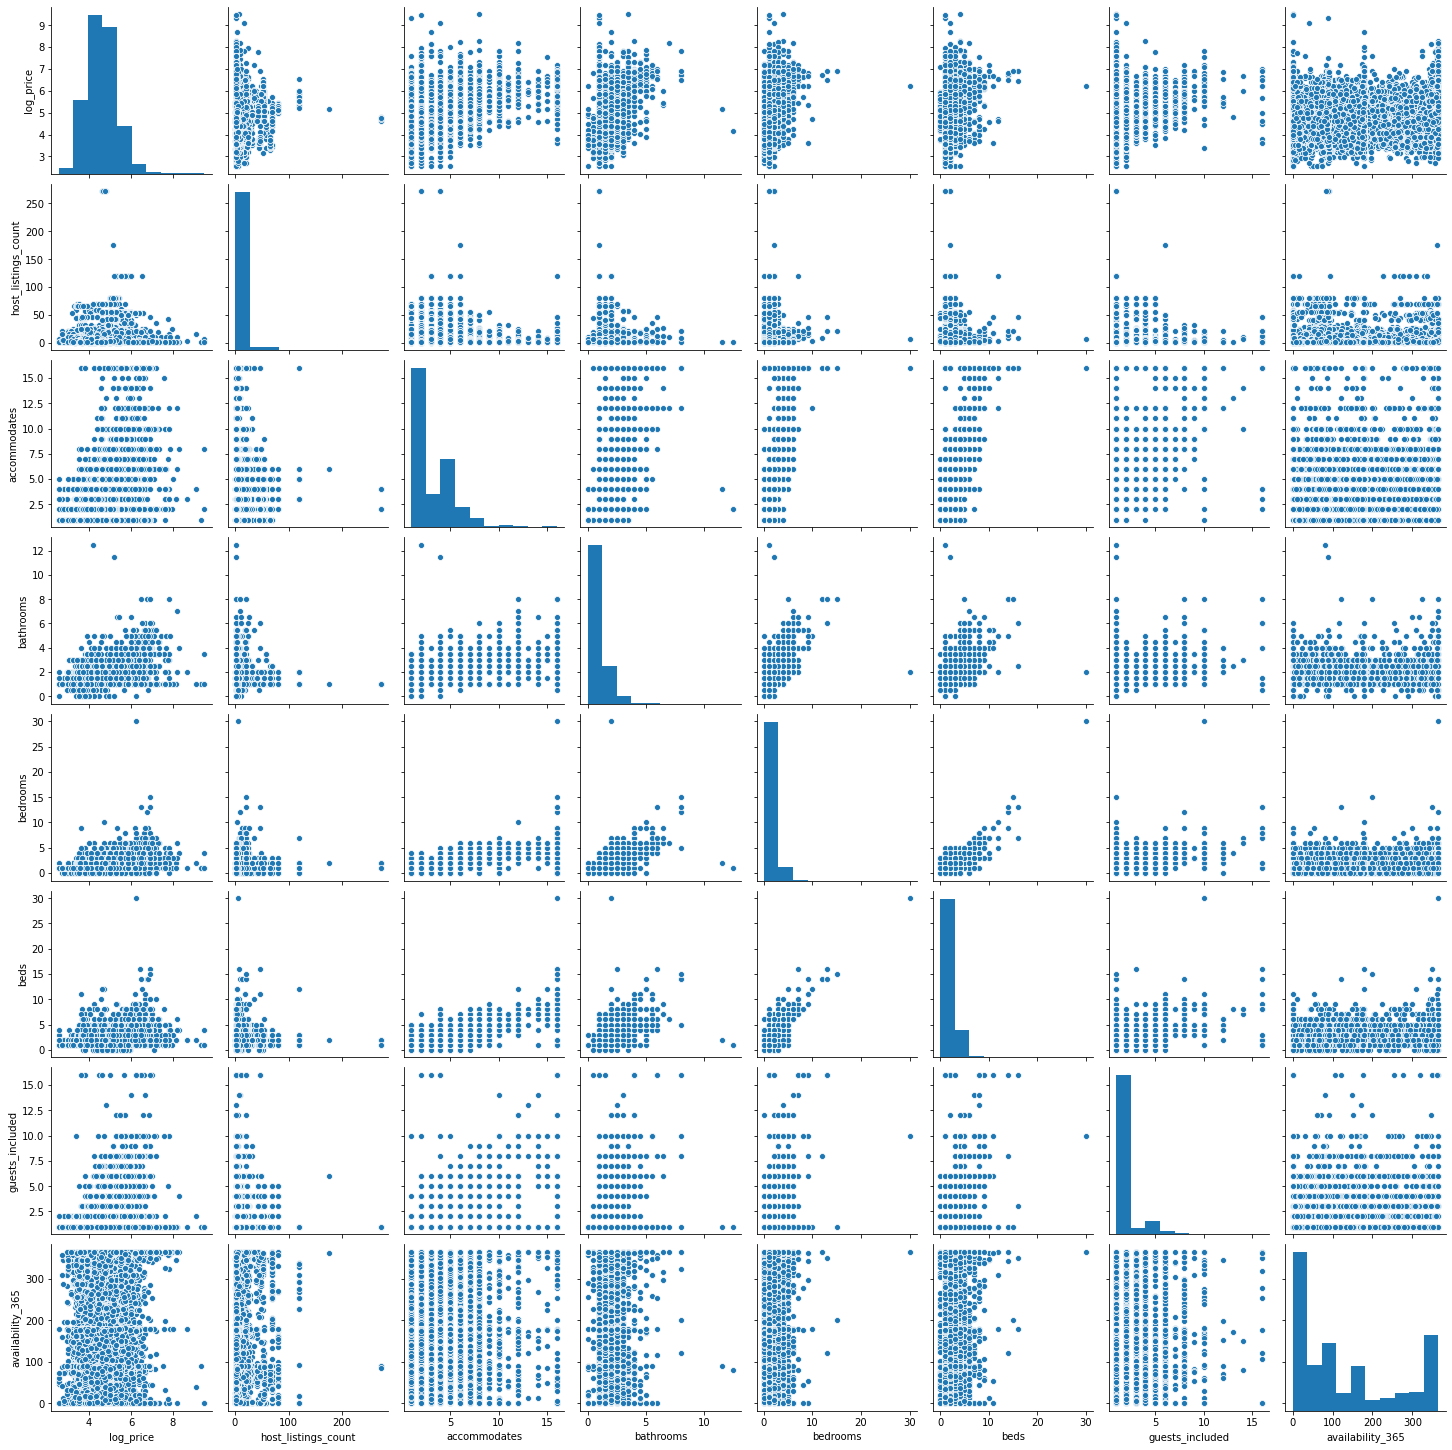

In [24]:
sns.pairplot(data=df_explore.loc[:, ['log_price'] + discrete_vars])
plt.show()

Here we can begin to see some clear patterns, particularly with higher price AirBnB's accommodating more people.

For categorical variables we will again visualize the differences, this time with boxplots. 

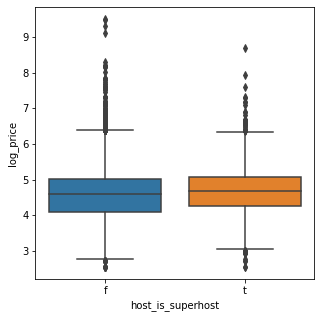

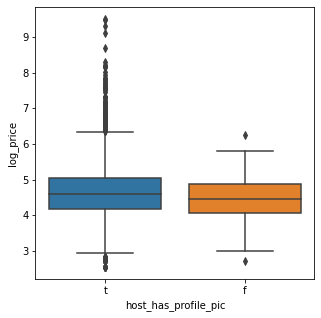

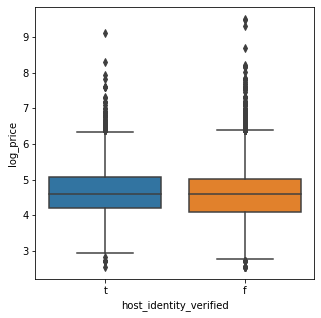

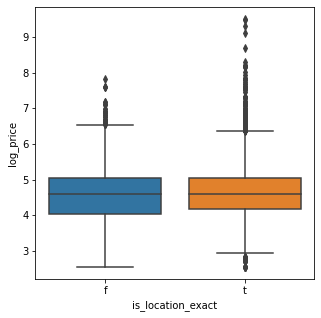

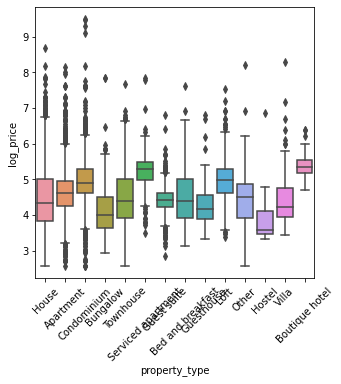

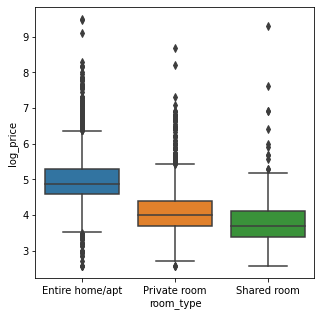

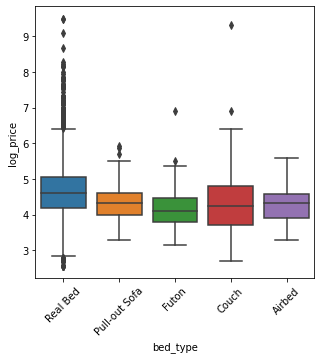

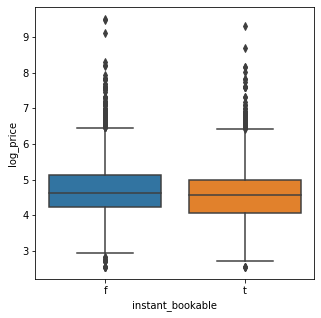

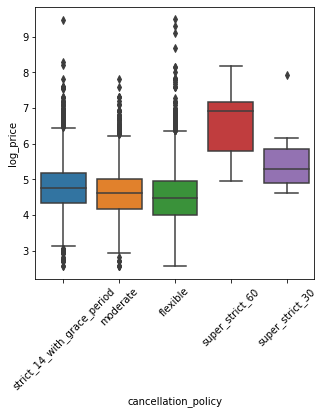

In [25]:
for item in [x for x in categorical_vars if x != 'amenities']:
#    if item == 'amenities':
#        next
    plt.figure(figsize=(5,5))
    sns.boxplot(x=item, y='log_price', data=df_explore)
    if len(df_explore[item].unique()) > 4:
        plt.xticks(rotation=45)
    plt.show()

The categorical graphs show some other qualities correlating with high price, including privacy, bed quality, and cancellation policy.

Finally, we plot log_price geographically using the latitude and longitude features. We should see a nice scatterplot in the shape of Toronto as the result. This visualization is also helpful to show that there is not a clear linear relationship between price and position. However, there may be some non-linear features that could inform our choice of model.

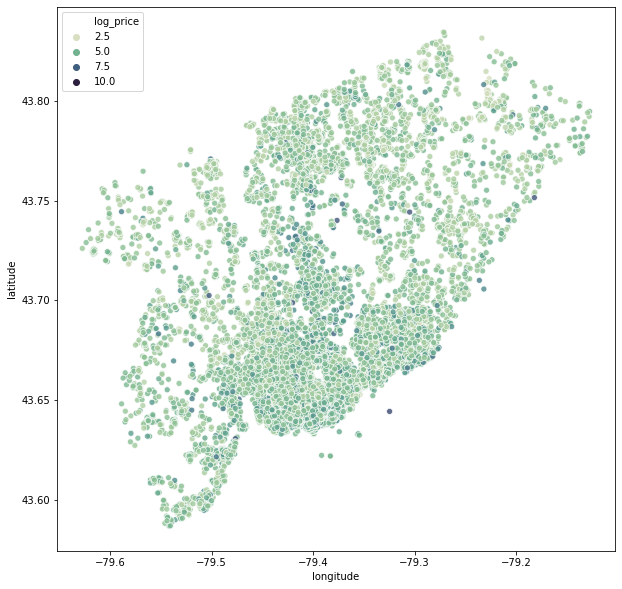

In [26]:
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True)
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', data=df_explore, palette=cmap, alpha=0.8)
plt.show()

In [27]:
# After dropping review features:
categorical_vars = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
            'is_location_exact', 'property_type', 'room_type', 'bed_type', 
            'instant_bookable', 'cancellation_policy']

discrete_vars = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                 'guests_included', 'availability_365']

continuous_vars = ['latitude', 'longitude']

dep_var = ['price']
df_explore

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,availability_365,review_scores_value,instant_bookable,cancellation_policy,log_price,log_reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,
1419,f,1.0,t,t,43.646168,-79.424510,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,470.0,1,0,10.0,f,strict_14_with_grace_period,6.152733,-1.832581
8077,f,2.0,t,f,43.641051,-79.376277,t,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,100.0,1,0,10.0,t,strict_14_with_grace_period,4.605170,0.392042
12604,f,1.0,t,t,43.667241,-79.415978,t,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,66.0,1,0,NaN,f,moderate,4.189655,NaN
23691,t,2.0,t,t,43.696017,-79.454683,t,House,Private room,2,1.0,1.0,1.0,Real Bed,70.0,2,351,9.0,t,strict_14_with_grace_period,4.248495,0.678034
26654,f,7.0,t,t,43.645305,-79.389404,t,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,199.0,2,328,9.0,f,strict_14_with_grace_period,5.293305,-1.021651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31517024,f,6.0,t,f,43.701751,-79.287846,t,Bungalow,Entire home/apt,3,1.0,1.0,2.0,Real Bed,61.0,3,263,NaN,t,strict_14_with_grace_period,4.110874,NaN
31517341,f,2.0,t,f,43.777792,-79.416747,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,50.0,1,346,NaN,t,strict_14_with_grace_period,3.912023,NaN
31517380,f,3.0,t,f,43.677890,-79.313121,f,House,Private room,2,1.0,1.0,1.0,Real Bed,150.0,1,83,NaN,t,flexible,5.010635,NaN


# Pipeline

In [28]:
print(df_explore.shape)
df_explore.isna().sum()

(19647, 22)


host_is_superhost            3
host_listings_count          3
host_has_profile_pic         3
host_identity_verified       3
latitude                     0
longitude                    0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                   14
bedrooms                     7
beds                        21
bed_type                     0
price                        0
guests_included              0
availability_365             0
review_scores_value       4050
instant_bookable             0
cancellation_policy          0
log_price                    0
log_reviews_per_month     3768
dtype: int64

In [29]:
# Categorical - impute, one hot encode
cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Numerical - impute, scale
num_si_step = ('si', SimpleImputer(strategy='median'))
num_scl_step = ('scl', MinMaxScaler())
num_steps = [num_si_step, num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

In [30]:
ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(df[categorical_vars + discrete_vars + continuous_vars])
X = ct.transform(df[categorical_vars + discrete_vars + continuous_vars])
# We know from our exploration that the dependent variable 'price' does not have any missing values. 
# It is also generally not necessary to apply transformations to normalize or scale the dependent variable.

y = df[['price']].values

# Train-test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15717, 68) (3930, 68) (15717, 1) (3930, 1)


# Stratified Sampling

In [32]:
df['lat_cat'] = np.ceil(df['latitude']*10)
print(df['lat_cat'].sample(frac=.2, random_state=0).value_counts())

437.0    3017
438.0     838
439.0      57
436.0      17
Name: lat_cat, dtype: int64


In [33]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# note that we pass the dataframe as arguments to the .split() method 
# rather than the numpy matrix X. This is done for easy comprehension
# as the numpy matrix no longer has labelled columns. You can compare the
# shapes of X and df to ensure we are getting the right rows.
for train_index, test_index in split.split(df, df['lat_cat'].fillna(df['lat_cat'].median())):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
        
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15717, 68) (3930, 68) (15717, 1) (3930, 1)


# Regression Models

**Basic Regressions**

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, np.ravel(y_train))

LinearRegression()

In [35]:
def display_results(model, X, y):
    print("RMSE:", rmse(model.predict(X), y))
    print("Predicted 1-5:", model.predict(X_test[0:5]))
    print("Actual 1-5:", y_test[0:5, 0])
    
display_results(reg, X, y)

RMSE: 853250912754.7223
Predicted 1-5: [ 51.5  77.5 145.5  56.   65.5]
Actual 1-5: [ 45.  38.  76.  69. 100.]


**ElasticNet**

In [36]:
from sklearn.linear_model import ElasticNet

enr = ElasticNet()
enr.fit(X_train, np.ravel(y_train))
display_results(enr, X, y)

RMSE: 229.05360081625304
Predicted 1-5: [ 97.60287359 107.13705813 161.25775042 111.17237008  95.65962275]
Actual 1-5: [ 45.  38.  76.  69. 100.]


**DecisionTreeRegressor**

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, np.ravel(y_train))
display_results(dtr, X, y)

RMSE: 306.8031023412919
Predicted 1-5: [ 73.  40. 100.  88.  31.]
Actual 1-5: [ 45.  38.  76.  69. 100.]


**SGDRegressor**

In [39]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=1e-3)
clf.fit(X_train, np.ravel(y_train))
display_results(clf, X, y)

RMSE: 242.41638738671347
Predicted 1-5: [ 58.90607863  76.24961793 137.75234758  63.78123038  54.21446416]
Actual 1-5: [ 45.  38.  76.  69. 100.]


# Cross-Validation

In [40]:
from sklearn.model_selection import cross_val_score
enr = ElasticNet()
scores = cross_val_score(enr, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
np.sqrt(-scores)

array([129.36841654, 325.20647905, 251.16609114, 215.60607491,
       128.32872966])

In [41]:
def display_scores(scores):
    print("Scores:", np.sqrt(-scores))
    print("Mean:", np.sqrt(-scores).mean())
    print("Standard deviation:", np.sqrt(-scores).std())

display_scores(scores)

Scores: [129.36841654 325.20647905 251.16609114 215.60607491 128.32872966]
Mean: 209.9351582610659
Standard deviation: 75.06028987182748


In [42]:
clf = SGDRegressor(max_iter=1000, tol=1e-3)
scores = cross_val_score(clf, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

Scores: [117.12842691 316.74571906 239.09089835 203.60834932 115.89243791]
Mean: 198.49316631031266
Standard deviation: 76.29037727547247


In [43]:
rfr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

Scores: [271.50672792 344.75293399 394.31983929 235.19551605 268.18390571]
Mean: 302.79178459274726
Standard deviation: 58.109962017008286


 We actually find that the SGD regressor has, on average, a lower  RMSE . Cross-validation can give us much more confidence in our calculation of performance metrics.

# Hyperparameter Search

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': 10.0 ** -np.arange(4, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2'],
    'learning_rate': ['invscaling'],
}

clf = SGDRegressor(max_iter=10000, tol=1e-3)

grid_search = GridSearchCV(estimator=clf, 
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5)

grid_search.fit(X=X, y=np.ravel(y))

GridSearchCV(cv=5, estimator=SGDRegressor(max_iter=10000),
             param_grid={'alpha': array([1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2']},
             scoring='neg_mean_squared_error')

In [45]:
print(grid_search.best_params_)
print("\n",grid_search.best_estimator_)

{'alpha': 0.0001, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'penalty': 'l2'}

 SGDRegressor(max_iter=10000)


In [46]:
final_model = grid_search.best_estimator_
display_results(final_model, X_test, y_test)

RMSE: 273.42865396401663
Predicted 1-5: [ 58.8148543   85.58290435 148.18227559  69.07910424  56.85089626]
Actual 1-5: [ 45.  38.  76.  69. 100.]


In [47]:
scores = cross_val_score(final_model, X, np.ravel(y), cv=5, scoring='neg_mean_squared_error')
display_scores(scores)

Scores: [116.83248023 316.46763982 239.20213935 203.68508314 116.56416093]
Mean: 198.55030069360748
Standard deviation: 76.13536121800544
